In [1]:
from transformers import pipeline
import pandas as pd

In [2]:
import pandas as pd
import gc

df = pd.read_csv("../data/clean_data.csv")
df['Sleep Duration'] = pd.to_numeric(df['Sleep Duration'], errors='coerce')

def generate_feedback(row):
    feedback = [] 

    if row.get('Have you ever had suicidal thoughts ?', 0) == 1:
        feedback.append("Lately, I’ve been having overwhelming thoughts and feel emotionally exhausted.")
    if row.get('Academic Pressure', 0) >= 4:
        feedback.append("The academic workload is too much to handle and often leaves me anxious.")
    elif row.get('Academic Pressure', 0) <= 2:
        feedback.append("I feel relaxed and confident about my academic workload.")
    if row.get('Financial Stress', 0) >= 4:
        feedback.append("Managing finances has been stressful and distracting me from my studies.")
    if row.get('Study Satisfaction', 0) <= 2:
        feedback.append("I am not satisfied with my current progress or learning experience.")
    if row.get('Sleep Duration', 0) <= 5:
        feedback.append("I’ve been getting very little sleep, which makes it hard to focus.")
    if row.get('Dietary Habits', '') == 'Unhealthy':
        feedback.append("My eating habits have worsened recently, and I feel low on energy.")

    if len(feedback) == 0:
        feedback.append("I feel balanced and content with my studies and lifestyle.")

    return " ".join(feedback)


feedback_list = []
chunk_size = 500 

for start in range(0, len(df), chunk_size):
    chunk = df.iloc[start:start + chunk_size]
    chunk_feedback = [generate_feedback(row) for _, row in chunk.iterrows()]
    feedback_list.extend(chunk_feedback)


    del chunk, chunk_feedback
    gc.collect()

    print(f"Processed {start + chunk_size if start + chunk_size < len(df) else len(df)} / {len(df)} rows...")

df['feedback'] = feedback_list
df.to_csv("../data/clean_data_with_feedback.csv", index=False)
print("Feedback successfully generated and saved!")


Processed 500 / 27882 rows...
Processed 1000 / 27882 rows...
Processed 1500 / 27882 rows...
Processed 2000 / 27882 rows...
Processed 2500 / 27882 rows...
Processed 3000 / 27882 rows...
Processed 3500 / 27882 rows...
Processed 4000 / 27882 rows...
Processed 4500 / 27882 rows...
Processed 5000 / 27882 rows...
Processed 5500 / 27882 rows...
Processed 6000 / 27882 rows...
Processed 6500 / 27882 rows...
Processed 7000 / 27882 rows...
Processed 7500 / 27882 rows...
Processed 8000 / 27882 rows...
Processed 8500 / 27882 rows...
Processed 9000 / 27882 rows...
Processed 9500 / 27882 rows...
Processed 10000 / 27882 rows...
Processed 10500 / 27882 rows...
Processed 11000 / 27882 rows...
Processed 11500 / 27882 rows...
Processed 12000 / 27882 rows...
Processed 12500 / 27882 rows...
Processed 13000 / 27882 rows...
Processed 13500 / 27882 rows...
Processed 14000 / 27882 rows...
Processed 14500 / 27882 rows...
Processed 15000 / 27882 rows...
Processed 15500 / 27882 rows...
Processed 16000 / 27882 rows

In [3]:
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
sentiment_analyzer = pipeline("sentiment-analysis")

Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [4]:
df['Sentiment'] = df['feedback'].apply(lambda x: sentiment_analyzer(str(x))[0]['label'])
df['Sentiment_Score'] = df['feedback'].apply(lambda x: sentiment_analyzer(str(x))[0]['score'])

<Axes: xlabel='Sentiment', ylabel='count'>

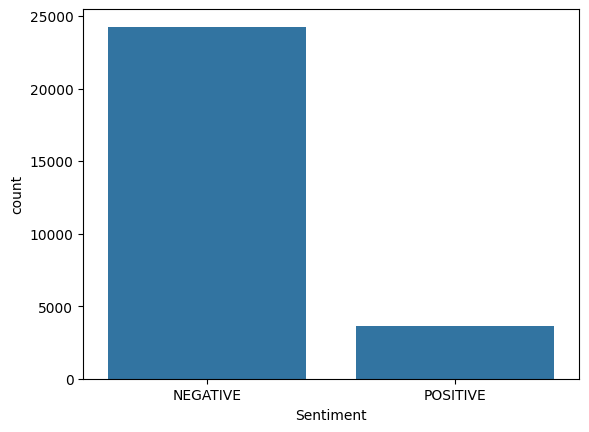

In [5]:
import seaborn as sns
sns.countplot(x='Sentiment', data=df)